<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-29(census_for_densely_highest_population).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sn
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['india_census_housing-hlpca-full.csv', 'hlpca-colnames.csv', 'india-districts-census-2011.csv']


In [0]:
house_data = pd.read_csv('../input/india_census_housing-hlpca-full.csv')
house_data.columns

Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

In [0]:
data = pd.read_csv('../input/india-districts-census-2011.csv')
data.columns[:28]

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST', 'Workers',
       'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers',
       'Non_Workers', 'Cultivator_Workers', 'Agricultural_Workers',
       'Household_Workers', 'Other_Workers', 'Hindus', 'Muslims',
       'Christians'],
      dtype='object')

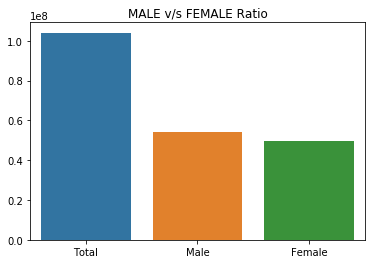

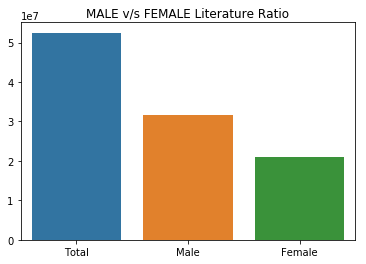

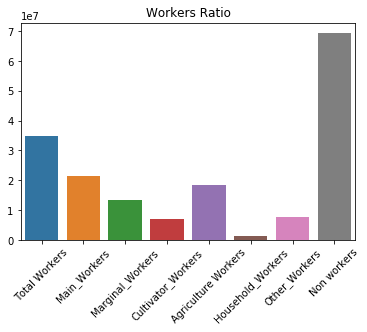

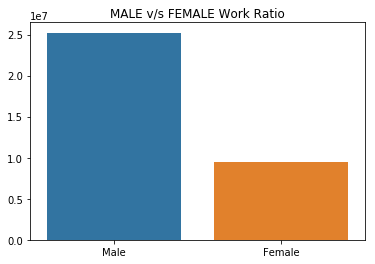

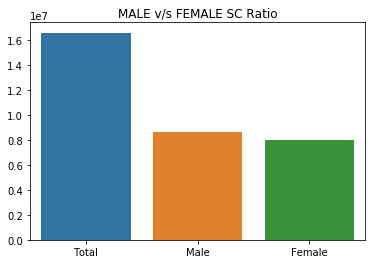

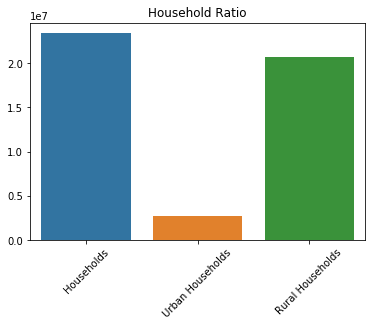

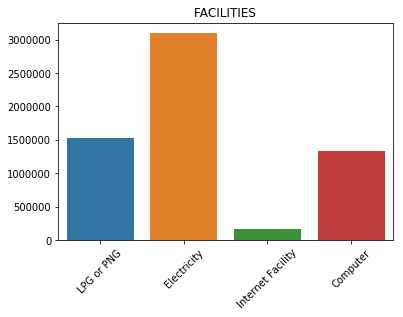

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [0]:
states_data_br = data.loc[data['State name']=='BIHAR']
states_data_br = states_data_br.dropna()
states_pop_br = states_data_br.Population.sum()
states_pop_br_male = states_data_br.Male.sum()
states_pop_br_female = states_data_br.Female.sum()
states_pop_br_lit = states_data_br.Literate.sum()
states_pop_br_lit_male = states_data_br.Male_Literate.sum()
states_pop_br_lit_female = states_data_br.Female_Literate.sum()
states_pop_br_work = states_data_br.Workers.sum()
states_pop_br_nwork = states_data_br.Non_Workers.sum()
states_pop_br_agwork = states_data_br.Agricultural_Workers.sum()
states_pop_br_mnwork = states_data_br.Main_Workers.sum()
states_pop_br_mgwork = states_data_br.Marginal_Workers.sum()
states_pop_br_cvwork = states_data_br.Cultivator_Workers.sum()
states_pop_br_hhwork = states_data_br.Household_Workers.sum()
states_pop_br_otwork = states_data_br.Other_Workers.sum()
states_pop_br_work_male = states_data_br.Male_Workers.sum()
states_pop_br_work_female = states_data_br.Female_Workers.sum()
states_pop_br_sc = states_data_br.SC.sum()
states_pop_br_sc_male = states_data_br.Male_SC.sum()
states_pop_br_sc_female = states_data_br.Female_SC.sum()


labels_br = ['Total','Male','Female']
li_br = [states_pop_br,states_pop_br_male,states_pop_br_female]
plt.title('MALE v/s FEMALE Ratio')
sn.barplot(labels_br,li_br)
plt.show()

labels_br_l = ['Total','Male','Female']
li_br_l = [states_pop_br_lit,states_pop_br_lit_male,states_pop_br_lit_female]
plt.title('MALE v/s FEMALE Literature Ratio')
sn.barplot(labels_br_l,li_br_l)
plt.show()

labels_br_w = ['Total Workers','Main_Workers','Marginal_Workers','Cultivator_Workers','Agriculture Workers','Household_Workers', 'Other_Workers','Non workers']
plt.xticks(rotation=45)
li_br_w = [states_pop_br_work,states_pop_br_mnwork,states_pop_br_mgwork,states_pop_br_cvwork,states_pop_br_agwork,states_pop_br_hhwork,states_pop_br_otwork,states_pop_br_nwork]
plt.title('Workers Ratio')
sn.barplot(labels_br_w,li_br_w)
plt.show()

labels_br_w = ['Male','Female']
li_br_w = [states_pop_br_work_male,states_pop_br_work_female]
plt.title('MALE v/s FEMALE Work Ratio')
sn.barplot(labels_br_w,li_br_w)
plt.show()


labels_br_sc = ['Total','Male','Female']
li_br_sc = [states_pop_br_sc,states_pop_br_sc_male,states_pop_br_sc_female]
plt.title('MALE v/s FEMALE SC Ratio')
sn.barplot(labels_br_sc,li_br_sc)
plt.show()

states_pop_br_hh = states_data_br.Households.sum()
states_pop_br_hhu = states_data_br.Urban_Households.sum()
states_pop_br_hhr = states_data_br.Rural_Households.sum()
labels_br_hh = ['Households','Urban Households','Rural Households']
plt.xticks(rotation=45)
li_br_hh = [states_pop_br_hh,states_pop_br_hhu,states_pop_br_hhr]
plt.title('Household Ratio')
sn.barplot(labels_br_hh,li_br_hh)
plt.show()

states_pop_br_hh_lp = states_data_br.LPG_or_PNG_Households.sum()
states_pop_br_hh_el = states_data_br.Housholds_with_Electric_Lighting.sum()
states_pop_br_hh_in = states_data_br.Households_with_Internet.sum()
states_pop_br_hh_co = states_data_br.Households_with_Computer.sum()
labels_br_hh_fa = ['LPG or PNG','Electricity','Internet Facility','Computer']
plt.xticks(rotation=45)
li_br_hh_fa = [states_pop_br_hh_lp,states_pop_br_hh_el,states_pop_br_hh_in,states_pop_br_hh_co]
plt.title('FACILITIES')
sn.barplot(labels_br_hh_fa,li_br_hh_fa)
plt.show()

states_data_br.columns


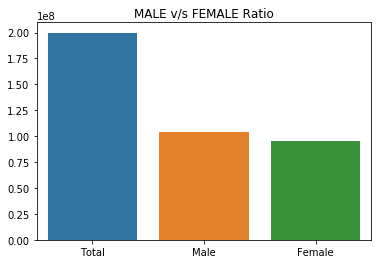

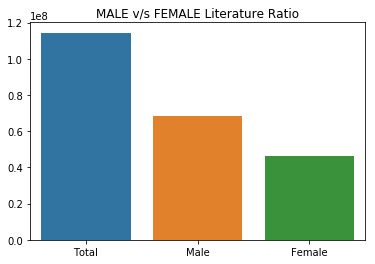

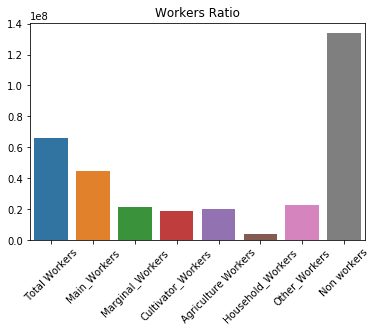

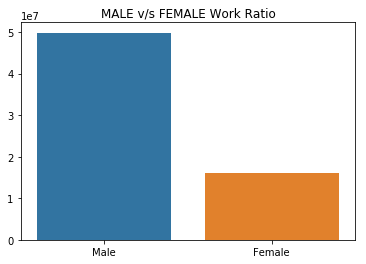

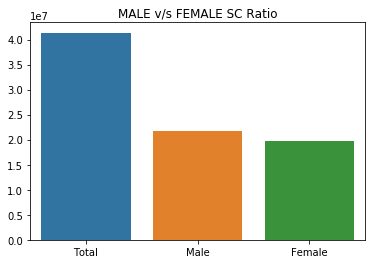

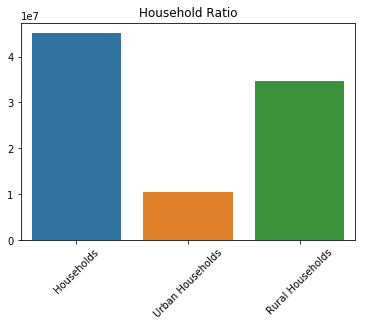

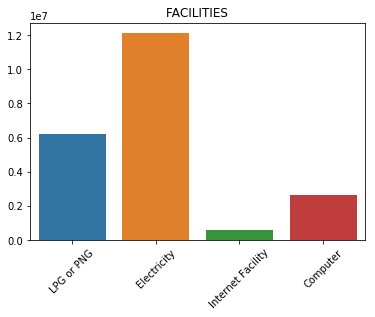

"\nfig,ax = plt.subplots(2,2)\n\nax[0][0].plot(labels_br,li_br,color='r')\nax[0][0].set_title('POPULATION',fontsize=14)\nax[0][1].plot(labels_br_l,li_br_l,color='b')\nax[0][1].set_title('LITERATURE',fontsize=14)\nax[1][0].plot(labels_br_w,li_br_w,color='g')\nax[1][0].set_title('WORKERS',fontsize=14)\nax[1][1].plot(labels_br_sc,li_br_sc,color='y')\nax[1][1].set_title('SC',fontsize=14)\n\nplt.subplots_adjust(wspace=0.5,hspace=0.5)\nplt.show()\n"

In [0]:
states_data_up = data.loc[data['State name']=='UTTAR PRADESH']
states_data_up = states_data_up.dropna()
states_pop_up = states_data_up.Population.sum()
states_pop_up_male = states_data_up.Male.sum()
states_pop_up_female = states_data_up.Female.sum()
states_pop_up_lit = states_data_up.Literate.sum()
states_pop_up_lit_male = states_data_up.Male_Literate.sum()
states_pop_up_lit_female = states_data_up.Female_Literate.sum()
states_pop_up_work = states_data_up.Workers.sum()
states_pop_up_nwork = states_data_up.Non_Workers.sum()
states_pop_up_agwork = states_data_up.Agricultural_Workers.sum()
states_pop_up_mnwork = states_data_up.Main_Workers.sum()
states_pop_up_mgwork = states_data_up.Marginal_Workers.sum()
states_pop_up_cvwork = states_data_up.Cultivator_Workers.sum()
states_pop_up_hhwork = states_data_up.Household_Workers.sum()
states_pop_up_otwork = states_data_up.Other_Workers.sum()
states_pop_up_work_male = states_data_up.Male_Workers.sum()
states_pop_up_work_female = states_data_up.Female_Workers.sum()
states_pop_up_sc = states_data_up.SC.sum()
states_pop_up_sc_male = states_data_up.Male_SC.sum()
states_pop_up_sc_female = states_data_up.Female_SC.sum()


labels_up = ['Total','Male','Female']
li_up = [states_pop_up,states_pop_up_male,states_pop_up_female]
plt.title('MALE v/s FEMALE Ratio')
sn.barplot(labels_up,li_up)
plt.show()

labels_up_l = ['Total','Male','Female']
li_up_l = [states_pop_up_lit,states_pop_up_lit_male,states_pop_up_lit_female]
plt.title('MALE v/s FEMALE Literature Ratio')
sn.barplot(labels_up_l,li_up_l)
plt.show()
"""
'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers',
       'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers'"""
labels_up_w = ['Total Workers','Main_Workers','Marginal_Workers','Cultivator_Workers','Agriculture Workers','Household_Workers', 'Other_Workers','Non workers']
plt.xticks(rotation=45)
li_up_w = [states_pop_up_work,states_pop_up_mnwork,states_pop_up_mgwork,states_pop_up_cvwork,states_pop_up_agwork,states_pop_up_hhwork,states_pop_up_otwork,states_pop_up_nwork]
plt.title('Workers Ratio')
sn.barplot(labels_up_w,li_up_w)
plt.show()

labels_up_w = ['Male','Female']
li_up_w = [states_pop_up_work_male,states_pop_up_work_female]
plt.title('MALE v/s FEMALE Work Ratio')
sn.barplot(labels_up_w,li_up_w)
plt.show()


labels_up_sc = ['Total','Male','Female']
li_up_sc = [states_pop_up_sc,states_pop_up_sc_male,states_pop_up_sc_female]
plt.title('MALE v/s FEMALE SC Ratio')
sn.barplot(labels_up_sc,li_up_sc)
plt.show()

states_pop_up_hh = states_data_up.Households.sum()
states_pop_up_hhu = states_data_up.Urban_Households.sum()
states_pop_up_hhr = states_data_up.Rural_Households.sum()
labels_up_hh = ['Households','Urban Households','Rural Households']
plt.xticks(rotation=45)
li_up_hh = [states_pop_up_hh,states_pop_up_hhu,states_pop_up_hhr]
plt.title('Household Ratio')
sn.barplot(labels_up_hh,li_up_hh)
plt.show()


states_pop_up_hh_lp = states_data_up.LPG_or_PNG_Households.sum()
states_pop_up_hh_el = states_data_up.Housholds_with_Electric_Lighting.sum()
states_pop_up_hh_in = states_data_up.Households_with_Internet.sum()
states_pop_up_hh_co = states_data_up.Households_with_Computer.sum()
labels_up_hh_fa = ['LPG or PNG','Electricity','Internet Facility','Computer']
plt.xticks(rotation=45)
li_up_hh_fa = [states_pop_up_hh_lp,states_pop_up_hh_el,states_pop_up_hh_in,states_pop_up_hh_co]
plt.title('FACILITIES')
sn.barplot(labels_up_hh_fa,li_up_hh_fa)
plt.show()

states_data_up.columns
"""
fig,ax = plt.subplots(2,2)

ax[0][0].plot(labels_br,li_br,color='r')
ax[0][0].set_title('POPULATION',fontsize=14)
ax[0][1].plot(labels_br_l,li_br_l,color='b')
ax[0][1].set_title('LITERATURE',fontsize=14)
ax[1][0].plot(labels_br_w,li_br_w,color='g')
ax[1][0].set_title('WORKERS',fontsize=14)
ax[1][1].plot(labels_br_sc,li_br_sc,color='y')
ax[1][1].set_title('SC',fontsize=14)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()
"""


In [0]:
"""print(data.columns[41:65])
#states_pop_up_hh_co = states_data_up.Households_with_Computer.sum()
#print(states_pop_up_hh_lp)
states_data_up.Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car.sum()
states_data_up.Households_with_Scooter_Motorcycle_Moped.sum()"""

'print(data.columns[41:65])\n#states_pop_up_hh_co = states_data_up.Households_with_Computer.sum()\n#print(states_pop_up_hh_lp)\nstates_data_up.Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car.sum()\nstates_data_up.Households_with_Scooter_Motorcycle_Moped.sum()'